Aim = We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Inspecting the Dataset

In [3]:
bike.shape

(730, 16)

In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values in any column so cleaning of data is not required in this dataset.

## Dropping unwanted columns

- In this dataset, instant column simply shows unique values so its not useful in building LR model.
- dteday column is also not useful as all the insights we can get from this column is already provided in other columns next to it.
- casual and registered columns are like target columns and can give high correlation with cnt column as sum of them is equal to cnt column values.

Thus dropping this columns is better for building best LR model.

In [6]:
bike1 = bike.drop(columns = ['instant','dteday','casual','registered'])
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
#Replacing numeric values with strings in season column
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike1['season'] = bike1['season'].map(season_map)

In [8]:
#Replacing numeric values with strings in mnth column
mnth_map = {1:'jan', 2:'feb', 3:'mar', 4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'}
bike1['mnth'] = bike1['mnth'].map(mnth_map)

In [9]:
#Replacing numeric values with strings in weekday column
weekday_map = {0:'mon', 1:'tue', 2:'wed', 3:'thus',4:'fri',5:'sat',6:'sun'}
bike1['weekday'] = bike1['weekday'].map(weekday_map)

In [10]:
#Replacing numeric values with strings in weathersit column
weathersit_map = {1:'clear', 2:'mist+cloudy', 3:'light snow & rain'}
bike1['weathersit'] = bike1['weathersit'].map(weathersit_map)

In [11]:
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,tue,1,mist+cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,wed,1,mist+cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,thus,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,fri,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,sat,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Exploratory Data Analysis 

### Visualizing Numerical Variables

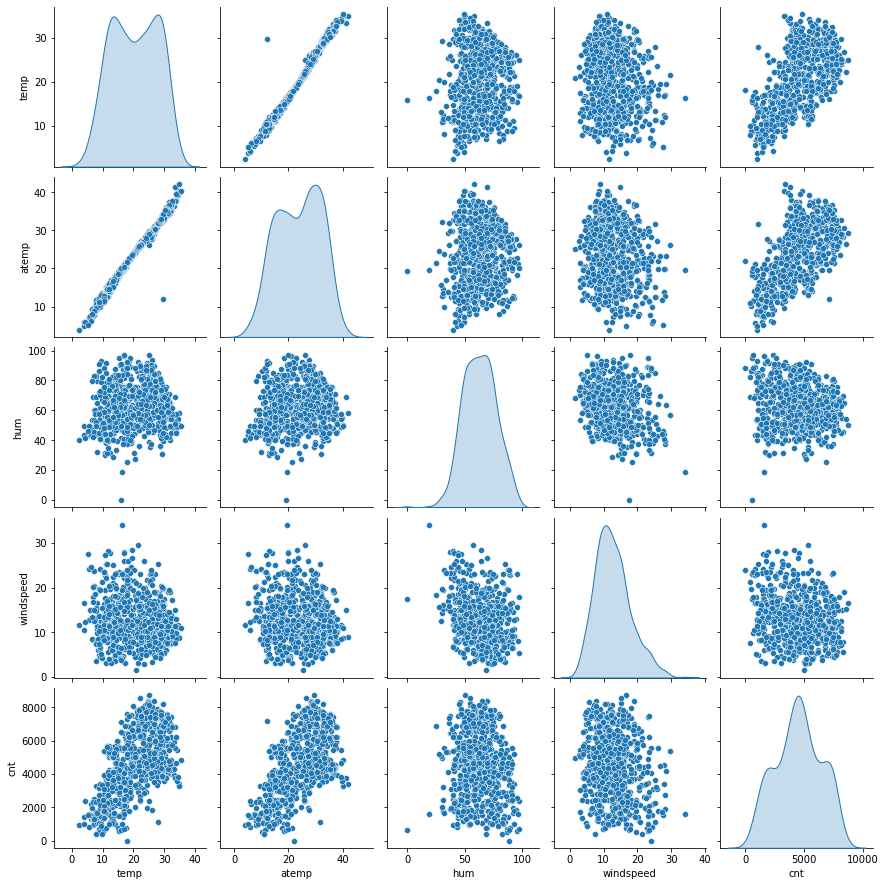

In [12]:
#creating pairplot for all numerical columns

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike2=bike1[num_vars]

sns.pairplot(bike2,diag_kind='kde')
plt.show()


- The above Pair-Plot tells us that there is a linear relation between 'temp','atemp' and 'cnt'

### Visualising Catagorical Variables

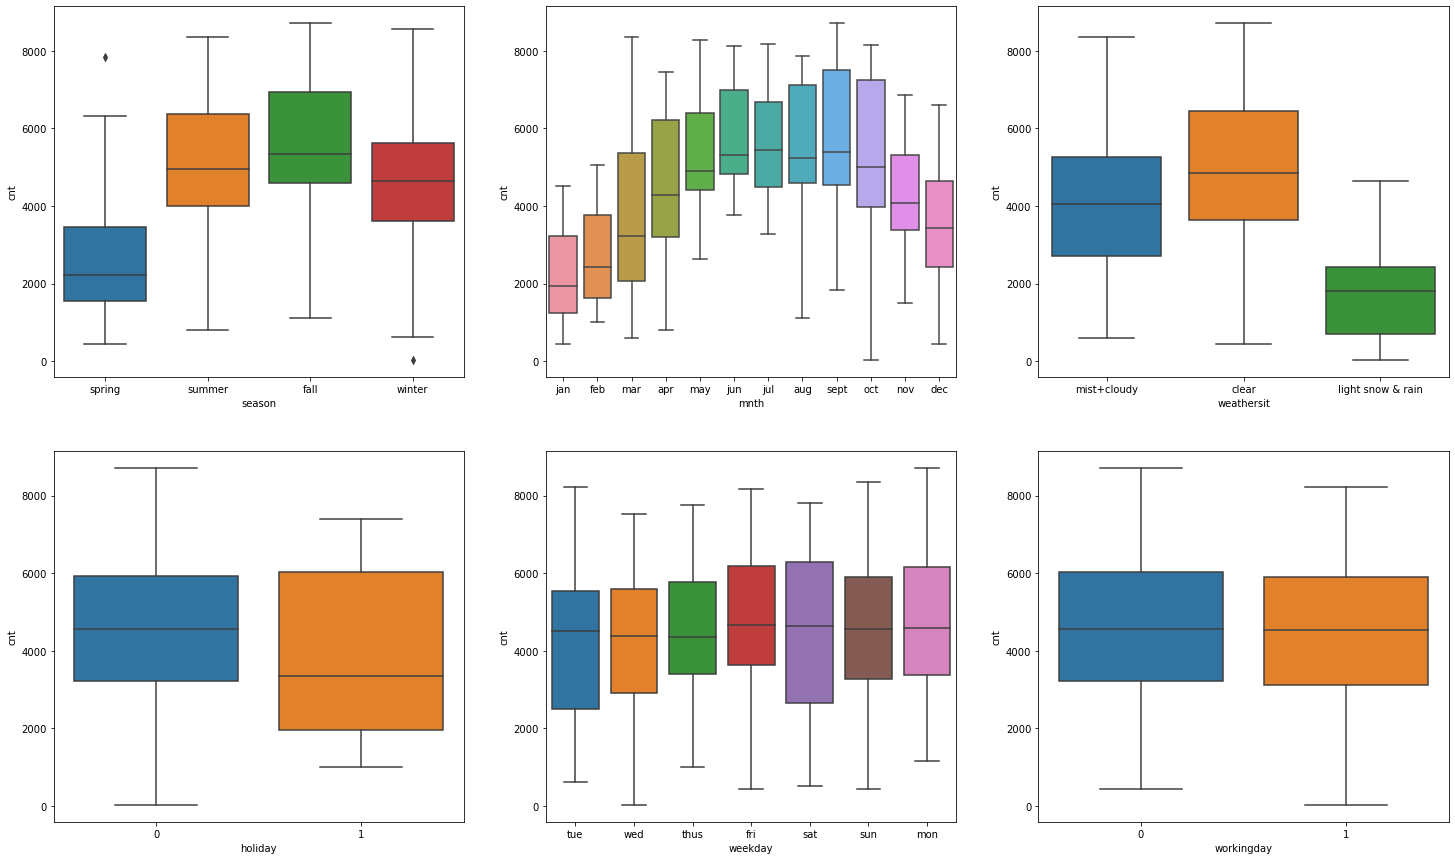

In [13]:
plt.figure(figsize=(25, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike1)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike1)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike1)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike1)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike1)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike1)
plt.show()

- inference 1 = season: Most of the bike booking were happening in fall with a median of over 5000 booking (for the period of 2 years). This was followed by summer & winter season with median above 4000 respectively. 


- inference 2 = mnth: Most of the bike booking were happening in the months of june,july,august,september and october. September month has highest booking with a median of over 5000 booking per month. 


- inference 3 = weathersit: Most of the bike booking were happening during clear weathersit with a median of close to 5000 booking (for the period of 2 years). This was followed by mist+cloudy weathersit with median around 4000 bookings per month.


- inference 4 = holiday: Most of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.


- inference 5 = weekday: weekday variable shows very close trend total booking on all days of the week having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. 


- inference 6 = workingday: Most of the bike booking were happening in ‘non-workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable.


### Creating Dummies for Categorical Columns

In [14]:
#Getting Dummies for categorical variables
bike2 = pd.get_dummies(bike1, drop_first=True)
bike2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            730 non-null    int64  
 1   holiday                       730 non-null    int64  
 2   workingday                    730 non-null    int64  
 3   temp                          730 non-null    float64
 4   atemp                         730 non-null    float64
 5   hum                           730 non-null    float64
 6   windspeed                     730 non-null    float64
 7   cnt                           730 non-null    int64  
 8   season_spring                 730 non-null    uint8  
 9   season_summer                 730 non-null    uint8  
 10  season_winter                 730 non-null    uint8  
 11  mnth_aug                      730 non-null    uint8  
 12  mnth_dec                      730 non-null    uint8  
 13  mnth_

In [15]:
#Checking the shape of bike2 dataset
bike2.shape

(730, 30)

Here columns like season_fall,mnth_Apr,weekday_Fri and weathersit_clear are been dropped by drop_first command as they are alphabetically first values in their respected categorical columns.

### Correlation Matrix

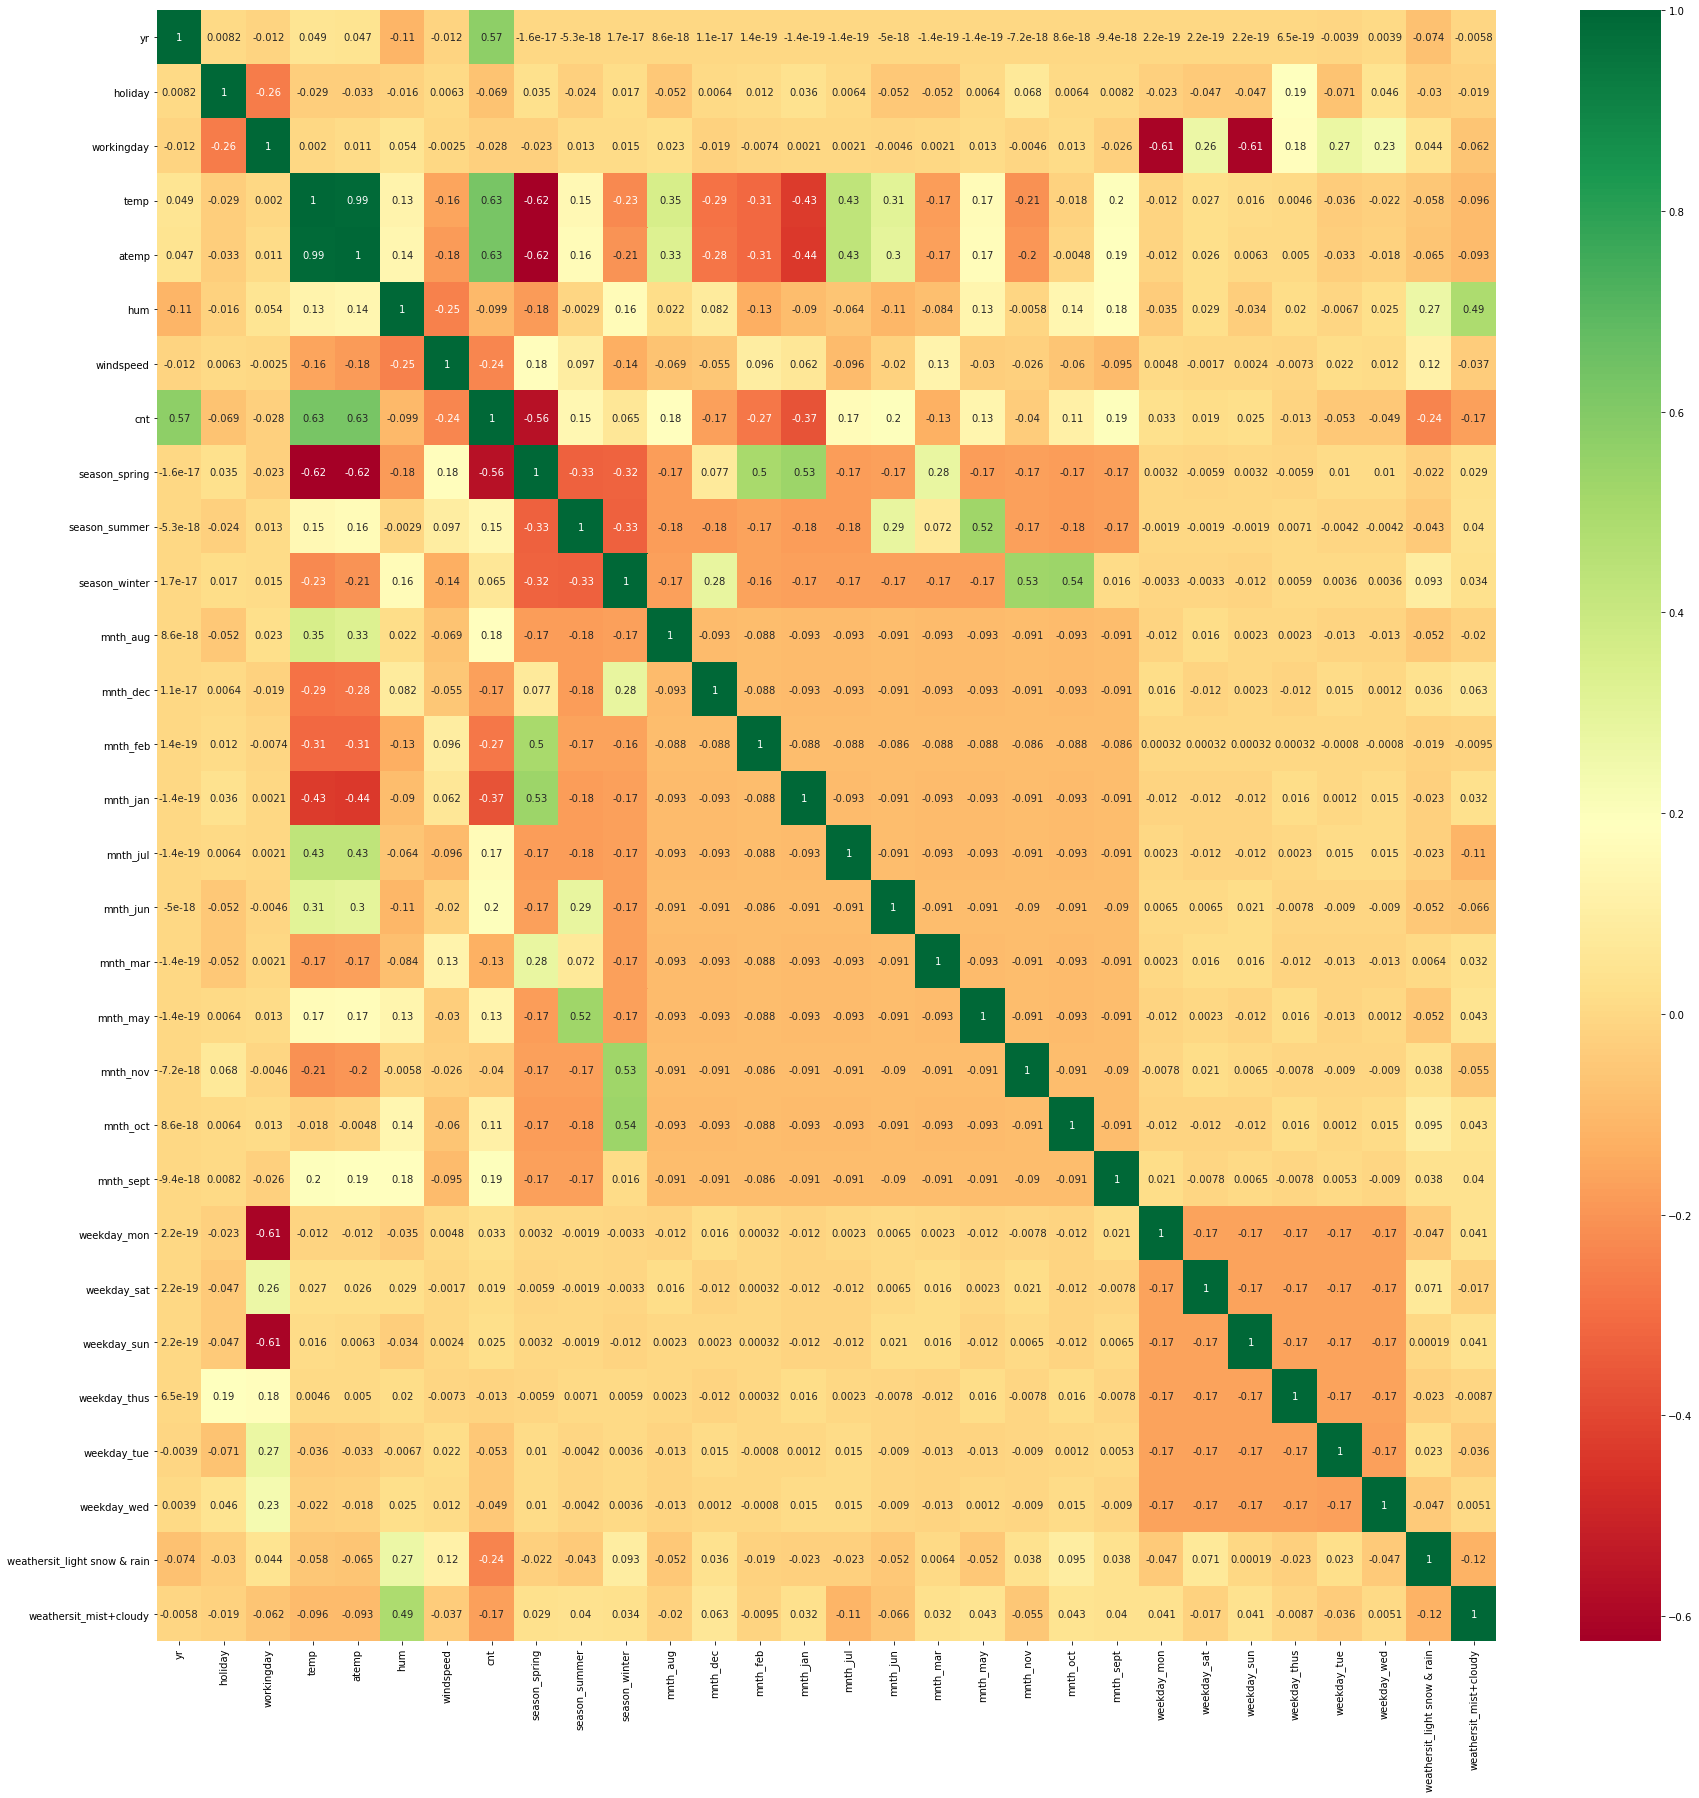

In [16]:
plt.figure(figsize = (30,30))
sns.heatmap(bike2.corr(),annot=True,cmap = 'RdYlGn')
plt.show()

- inference 1 = temp,atemp and yr variables have high collinearity with target variable count.
- inference 2 = Jan and Feb month,spring season and light snow & rainy weathersit have high negative collinearity with cnt variable.


## Preparing Dataset for Modeling

### Spliting Bike2 Dataset into Train and Test Dataset

In [17]:
#Creating train and test dataset from bike2 dataset
bike_train, bike_test = train_test_split(bike2, train_size = 0.70, test_size = 0.30, random_state = 100)

In [18]:
#Checking the shape of train dataset
bike_train.shape

(510, 30)

In [19]:
#Checking the shape of test dataset
bike_test.shape

(219, 30)

### Rescaling of Numerical Columns of Train Dataset

In [20]:
scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [21]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thus,weekday_tue,weekday_wed,weathersit_light snow & rain,weathersit_mist+cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## BUILDING A LINEAR MODEL

Dividing into X and Y sets for the model building

In [22]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [23]:
# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)# running RFE
rfe = rfe.fit(X_train, y_train)

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', False, 13),
 ('weekday_sun', False, 4),
 ('weekday_thus', False, 11),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 8),
 ('weathersit_light snow & rain', True, 1),
 ('weathersit_mist+cloudy', True, 1)]

In [26]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_light snow & rain',
       'weathersit_mist+cloudy'],
      dtype='object')

In [27]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thus', 'weekday_tue', 'weekday_wed'],
      dtype='object')

### Model 1

In [28]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [29]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_mist+cloudy,2.32
0,yr,2.09
11,mnth_nov,1.83
9,mnth_jan,1.75


In [30]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [31]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.34e-189
Time:                        21:33:56   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Model 2

- Removing the variable 'hum' based on its High VIF

In [32]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_nov,1.80
8,mnth_jan,1.66
9,mnth_jul,1.59
13,weathersit_mist+cloudy,1.56


In [34]:
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [35]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.57e-186
Time:                        21:33:56   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Model 3

- Removing 'season_summer' based on its high p-value compared to other variables.

In [36]:
X_train_new1 = X_train_new.drop(["season_summer"], axis = 1)

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,season_winter,2.54
4,season_spring,2.36
0,yr,2.06
9,mnth_nov,1.80
7,mnth_jan,1.65
12,weathersit_mist+cloudy,1.53
6,mnth_dec,1.46
8,mnth_jul,1.36


In [38]:
X_train_lm3 = sm.add_constant(X_train_new1)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [39]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.08e-186
Time:                        21:33:56   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Model 4

- Removing 'mnth_nov' based on its high p-value compared to other variables.

In [40]:
X_train_new2 = X_train_new1.drop(["mnth_nov"], axis = 1)

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_spring,2.36
0,yr,2.06
5,season_winter,1.64
7,mnth_jan,1.64
11,weathersit_mist+cloudy,1.53
8,mnth_jul,1.36
6,mnth_dec,1.29
9,mnth_sept,1.20


In [42]:
X_train_lm4 = sm.add_constant(X_train_new2)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [43]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.02e-186
Time:                        21:33:57   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Model 5

- Removing 'mnth_dec' based on its high p-value compared to other variables.

In [44]:
X_train_new3 = X_train_new2.drop(["mnth_dec"], axis = 1)

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_spring,2.25
0,yr,2.06
6,mnth_jan,1.60
10,weathersit_mist+cloudy,1.53
5,season_winter,1.40
7,mnth_jul,1.36
8,mnth_sept,1.20
9,weathersit_light snow & rain,1.08


In [46]:
X_train_lm5 = sm.add_constant(X_train_new3)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [47]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.13e-186
Time:                        21:33:57   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Model 6

- Removing 'mnth_jan' based on its high p-value compared to other variables.

In [48]:
X_train_new4 = X_train_new3.drop(["mnth_jan"], axis = 1)

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,season_spring,1.65
9,weathersit_mist+cloudy,1.51
5,season_winter,1.40
6,mnth_jul,1.35
7,mnth_sept,1.20
8,weathersit_light snow & rain,1.08
1,holiday,1.04


In [50]:
X_train_lm6 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [51]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.16e-186
Time:                        21:33:57   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## ASSUMPTIONS

### Error terms are normally distributed with mean zero (not X, Y)


In [54]:
# Residual Analysis Of Training Data
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

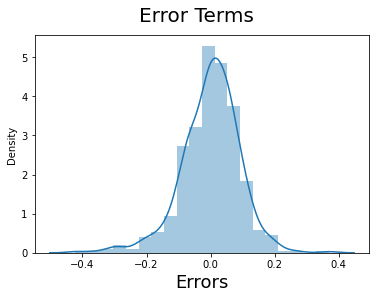

In [55]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)          
plt.xlabel('Errors', fontsize = 18)  

- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### There is a linear relationship between X and Y

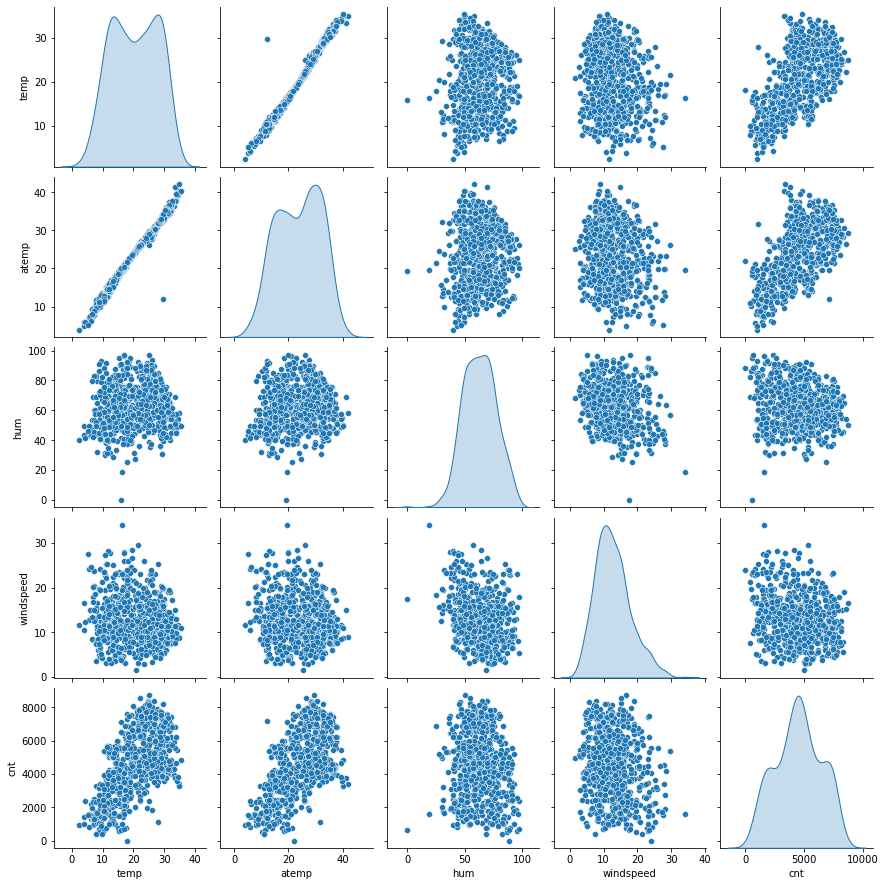

In [56]:
bike2=bike2[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike2, diag_kind='kde')
plt.show()

- Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

### No Multicollinearity between the predictor variables

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,season_spring,1.65
9,weathersit_mist+cloudy,1.51
5,season_winter,1.40
6,mnth_jul,1.35
7,mnth_sept,1.20
8,weathersit_light snow & rain,1.08
1,holiday,1.04


- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of <5.

## MAKING PREDICTION USING FINAL MODEL
- Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

In [58]:
# Apply scaler() to all numeric variables in test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [59]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thus,weekday_tue,weekday_wed,weathersit_light snow & rain,weathersit_mist+cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,1,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,0,0


In [60]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thus,weekday_tue,weekday_wed,weathersit_light snow & rain,weathersit_mist+cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.155251,0.132420,0.173516,0.155251,0.118721,0.123288,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.362974,0.339723,0.379560,0.362974,0.324202,0.329520,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing Bike_test into X_test and y_test

In [61]:
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            219 non-null    int64  
 1   holiday                       219 non-null    int64  
 2   workingday                    219 non-null    int64  
 3   temp                          219 non-null    float64
 4   atemp                         219 non-null    float64
 5   hum                           219 non-null    float64
 6   windspeed                     219 non-null    float64
 7   season_spring                 219 non-null    uint8  
 8   season_summer                 219 non-null    uint8  
 9   season_winter                 219 non-null    uint8  
 10  mnth_aug                      219 non-null    uint8  
 11  mnth_dec                      219 non-null    uint8  
 12  mnth_feb                      219 non-null    uint8  
 13  mnth

In [62]:
#Selecting the variables that were part of final model.
col1=X_train_new4.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   yr                            219 non-null    int64  
 2   holiday                       219 non-null    int64  
 3   temp                          219 non-null    float64
 4   windspeed                     219 non-null    float64
 5   season_spring                 219 non-null    uint8  
 6   season_winter                 219 non-null    uint8  
 7   mnth_jul                      219 non-null    uint8  
 8   mnth_sept                     219 non-null    uint8  
 9   weathersit_light snow & rain  219 non-null    uint8  
 10  weathersit_mist+cloudy        219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [63]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

## MODEL EVALUATION

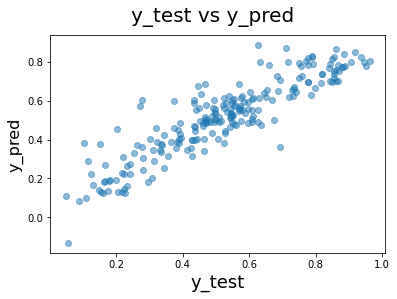

In [64]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)           
plt.xlabel('y_test', fontsize = 18)                      
plt.ylabel('y_pred', fontsize = 16) 
plt.show()


## R^2 Value for TEST 

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8070101019557961

## Adjusted R^2 Value for TEST

In [66]:
# We already have the value of R^2 (calculated in above step)

r2=0.8070101019557961

In [67]:
# Get the shape of X_test
X_test.shape

(219, 10)

In [68]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(((1-r2)*(n-1))/(n-p-1))
adjusted_r2

0.7977317414729017

## Final Result Comparison
- Train R^2 :0.833
- Train Adjusted R^2 :0.830
- Test R^2 :0.807
- Test Adjusted R^2 :0.798

This seems to be a really good model that can very well 'Generalize' various datasets.


### The equation of best fitted surface based on model lr6:
- cnt = 0.2519 + (yr * 0.2341) - (holiday * 0.0986) + (temp * 0.4515) − (windspeed * 0.1398) - (season_spring * 0.1108) + (season_winter * 0.0473) - (mnth_jul * 0.0727) + (mnth_sept * 0.0577) − (weathersit_light snow & rain * 0.2864) − (weathersit_mist+cloudy * 0.0811)

## FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are:

- Temperature (temp) - A coefficient value of ‘0.4515’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.4515 units.
- Weather Situation (weathersit_light snow & rain) - A coefficient value of ‘-0.2864’ indicated that, a unit increase in weathersit_light snow & rain decreases the bike hire numbers by 0.2864 units.
- Year (yr) - A coefficient value of ‘0.2341’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2341 units.


So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking.

